<a href="https://colab.research.google.com/github/sanjuth/dlvs/blob/main/weather_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
os.listdir('../input/multiclass-weather-dataset')

['dataset']

In [ ]:
os.listdir('../input/multiclass-weather-dataset/dataset')

['cloudy', 'sunrise', 'alien_test', 'shine', 'test.csv', 'foggy', 'rainy']

In [ ]:
from PIL import Image

In [ ]:
def load_images(path):
    imgs = []
    label = []
    l1 = os.listdir(path)
    for i in l1:
        if i!='test.csv' and i!='alien_test':
            l2 = os.listdir(path+'/'+i)
            for j in l2:
                img = Image.open(path+i+'/'+j).convert('RGB')
                img = img.resize(size=(32,32))
                imgs.append(np.array(img))
                label.append(i)
                del img
   
    return np.array(imgs),label

In [ ]:
x,y = load_images('../input/multiclass-weather-dataset/dataset/')

In [ ]:
x.shape

(1500, 32, 32, 3)

In [ ]:
len(y)

1500

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y=label_encoder.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
len(y_train)

1200

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense
from tensorflow.keras.layers import MaxPool2D

In [ ]:
model=Sequential()
model.add(Conv2D(32,activation="relu",kernel_size=3,input_shape=x_train.shape[1:]))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,activation="relu",kernel_size=3))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,activation='relu',kernel_size=3))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(5,activation='softmax'))

2022-12-01 14:34:29.068888: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [ ]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30


2022-12-01 14:34:29.353587: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


38/38 [==============================] - 2s 21ms/step - loss: 10.4971 - accuracy: 0.4400
Epoch 2/30
38/38 [==============================] - 1s 20ms/step - loss: 0.9113 - accuracy: 0.6300
Epoch 3/30
38/38 [==============================] - 1s 20ms/step - loss: 0.8112 - accuracy: 0.6825
Epoch 4/30
38/38 [==============================] - 1s 21ms/step - loss: 0.7537 - accuracy: 0.7150
Epoch 5/30
38/38 [==============================] - 1s 21ms/step - loss: 0.6999 - accuracy: 0.7467
Epoch 6/30
38/38 [==============================] - 1s 21ms/step - loss: 0.6266 - accuracy: 0.7683
Epoch 7/30
38/38 [==============================] - 1s 21ms/step - loss: 0.5752 - accuracy: 0.7817
Epoch 8/30
38/38 [==============================] - 1s 20ms/step - loss: 0.4953 - accuracy: 0.8092
Epoch 9/30
38/38 [==============================] - 1s 21ms/step - loss: 0.4601 - accuracy: 0.8233
Epoch 10/30
38/38 [==============================] - 1s 21ms/step - loss: 0.3933 - accuracy: 0.8458
Epoch 11/30
38/38 [

In [ ]:
_,acc = model.evaluate(x_test,y_test)
print("Test Accuracy : ",acc*100)

10/10 [==============================] - 0s 8ms/step - loss: 0.9737 - accuracy: 0.7833
Test Accuracy :  78.33333611488342


In [ ]:
def names(number):
    if number==0:
        return "cloudy"
    elif number==1:
        return "foggy"
    elif number==2:
        return "rainy"
    elif number==3:
        return "shine"
    elif number==4:
        return "sunrise"

In [ ]:
from matplotlib.pyplot import imshow
def Prediction(im):
    x = np.array(im.resize((32,32)))
    x = x.reshape(1,32,32,3)
    res = model.predict_on_batch(x)
    print(res)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(im)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

[[9.9998605e-01 5.9535528e-06 6.5557319e-06 1.4367685e-06 7.9776130e-10]]
99.99860525131226% Confidence cloudy


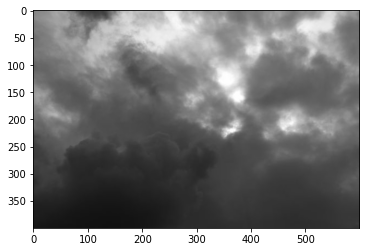

In [ ]:
test_img = Image.open("../input/multiclass-weather-dataset/dataset/cloudy/cloudy1.jpg").convert('RGB')
Prediction(test_img)